<center> <h1> Object Size Experiments </h1> </center>

In [31]:
#import all packages needed
import json
import pandas as pd
import matplotlib.pyplot as plt

# Centralize the graphs and tables.
from IPython.core.display import HTML, display


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<center> <h3> Sequential Write Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth
0,0.25MB,14491
1,0.5MB,13224
2,1MB,14351
3,2MB,23011
4,4MB,30156
5,8MB,31435
6,16MB,30936
7,32MB,28623
8,64MB,27663


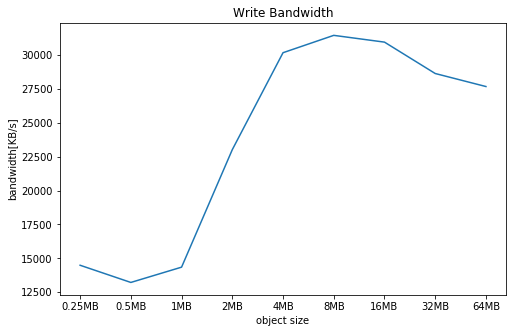

In [33]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_bw_list.append([object_sizes[i],data['jobs'][0]['write']['bw']])

w_bw_df = pd.DataFrame(w_bw_list, columns=['object size','bandwidth'])
display(w_bw_df)

fig = w_bw_df.plot(x='object size', y='bandwidth', title='Write Bandwidth' ,legend=False, xticks=w_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[KB/s]")
plt.show()


<center> <h3> Sequential Read Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth
0,0.25MB,21023
1,0.5MB,19444
2,1MB,19896
3,2MB,18070
4,4MB,21171
5,8MB,27071
6,16MB,37714
7,32MB,21445
8,64MB,15500


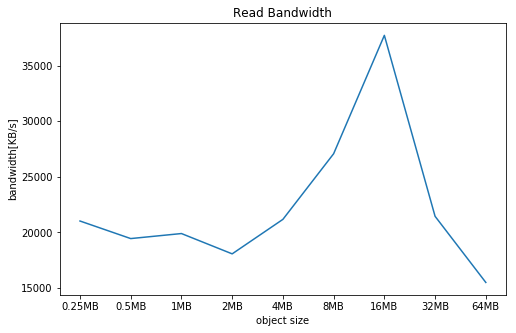

In [34]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_bw_list.append([object_sizes[i],data['jobs'][0]['read']['bw']])

r_bw_df = pd.DataFrame(r_bw_list, columns=['object size','bandwidth'])
display(r_bw_df)

fig = r_bw_df.plot(x='object size', y='bandwidth', title='Read Bandwidth' ,legend=False, xticks=r_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[KB/s]")
plt.show()

<center> <h3> Sequential Write Latency vs. Object Sizes </h3> </center>

,object size,latency
0,0.25MB,17.660317
1,0.5MB,38.709928
2,1MB,71.343745
3,2MB,88.991123
4,4MB,135.809246
5,8MB,260.571455
6,16MB,529.561448
7,32MB,1144.717879
8,64MB,2368.863674


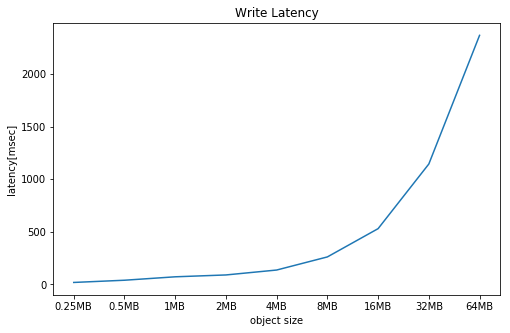

In [37]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_lat_list.append([object_sizes[i],data['jobs'][0]['write']['lat_ns']['mean']/1000000])

w_lat_df = pd.DataFrame(w_lat_list, columns=['object size','latency'])
display(w_lat_df)

fig = w_lat_df.plot(x='object size', y='latency', title='Write Latency' ,legend=False, xticks=w_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

<center> <h3> Sequential Read Latency vs. Object Sizes </h3> </center>

,object size,latency
0,0.25MB,12.172523
1,0.5MB,26.326265
2,1MB,51.459812
3,2MB,113.323248
4,4MB,193.458303
5,8MB,302.590306
6,16MB,434.392455
7,32MB,1527.901350
8,64MB,4227.902092


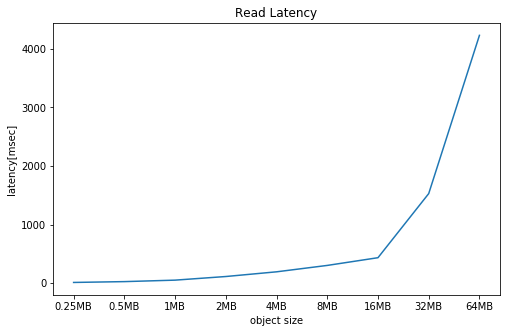

In [38]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_lat_list.append([object_sizes[i],data['jobs'][0]['read']['lat_ns']['mean']/1000000])

r_lat_df = pd.DataFrame(r_lat_list, columns=['object size','latency'])
display(r_lat_df)

fig = r_lat_df.plot(x='object size', y='latency', title='Read Latency' ,legend=False, xticks=r_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

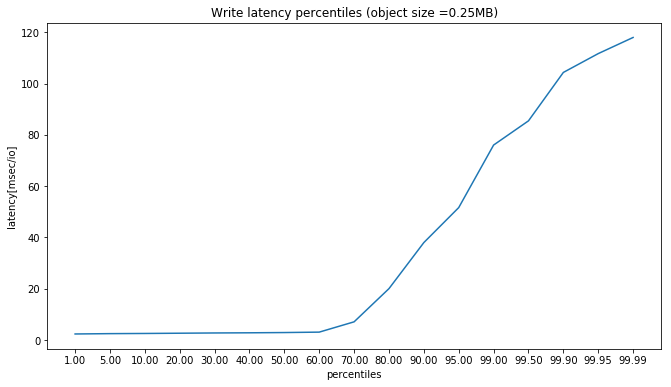

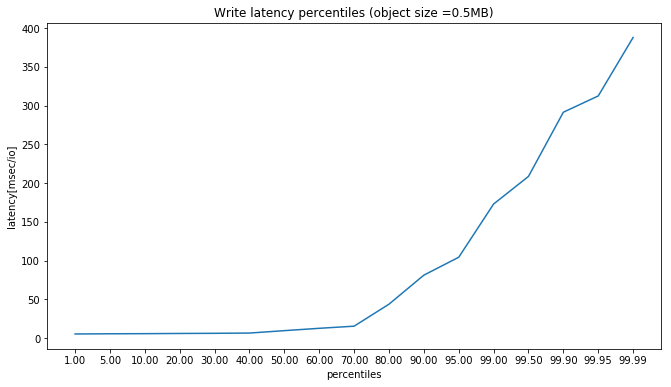

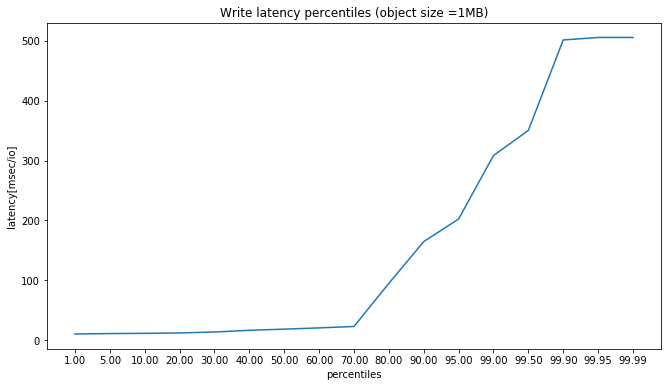

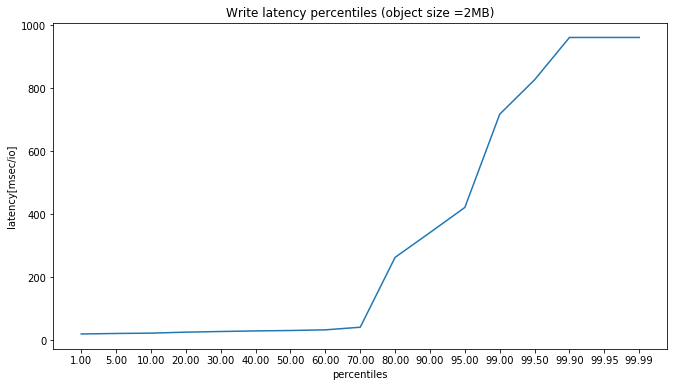

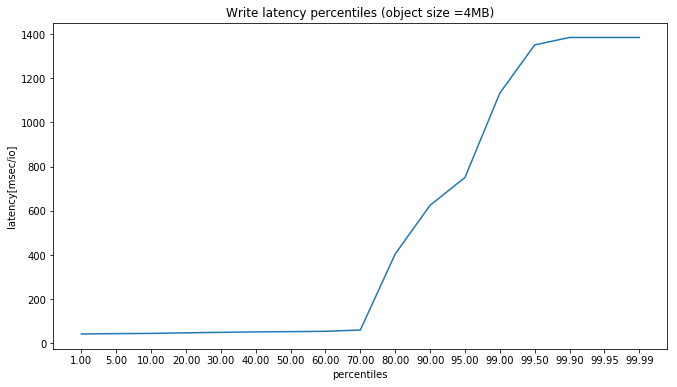

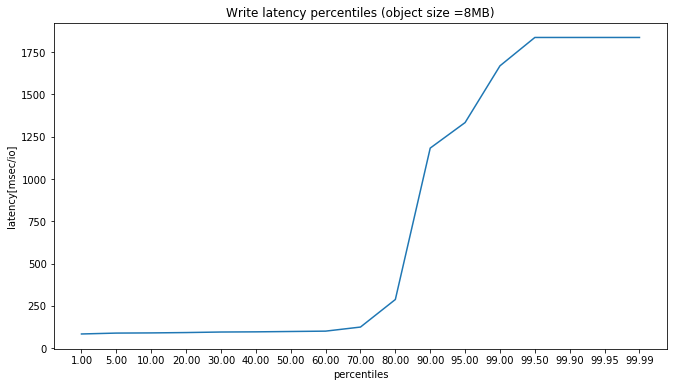

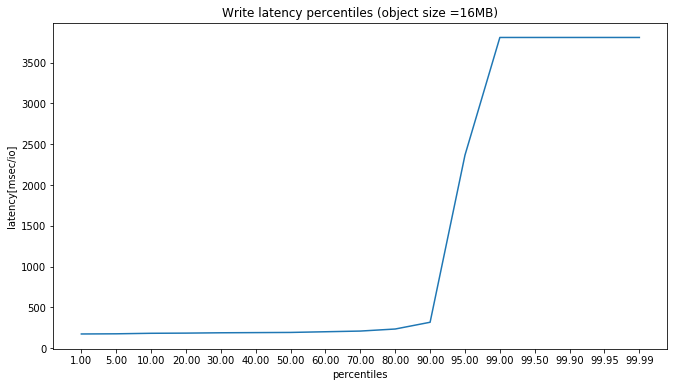

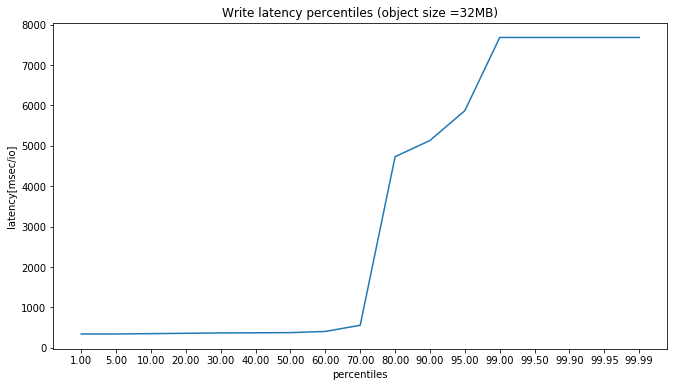

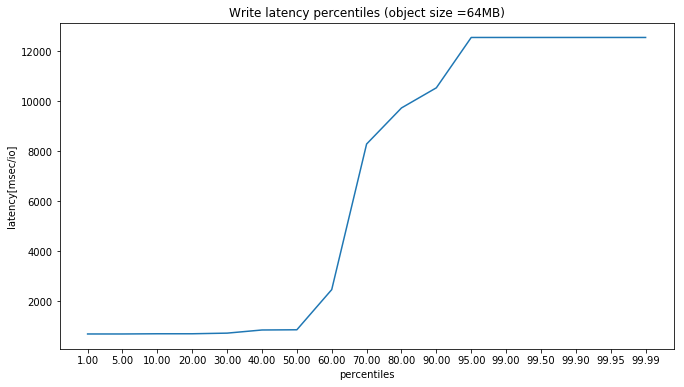

In [49]:
#read json result
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)

    #transform data
    percentiles_df = pd.DataFrame(data['jobs'][0]['read']['clat_ns']['percentile'],index=['latency'])
    percentiles_df = percentiles_df.T
    percentiles_df = percentiles_df.reset_index()
    percentiles_df.rename(columns={'index': 'percentiles'}, inplace=True)

    #format data
    percentiles_df[['percentiles']] = percentiles_df[['percentiles']].astype(float).applymap('{:,.2f}'.format)
    percentiles_df[['latency']] = percentiles_df[['latency']].astype(int).applymap(lambda x: x/1000000)

    #display table
    #display(percentiles_df)

    #display graph
    obj_size = object_sizes[i]
    fig = percentiles_df.plot(x='percentiles', y='latency', title="Write latency percentiles (object size =" + obj_size + ')' ,legend=False, xticks=percentiles_df.index , figsize=[11,6])
    fig.set_ylabel("latency[msec/io]")
    plt.show()
